# Python COVID
## Nom: MONIN
## Prenom: Louis

**Instructions:** Le devoir est à rendre sur Moodle, vous devez soumettre

- Le *notebook* ipython au format nom_prenom.ipynb
- Vous devez réaliser ce travail individuellement



Ce devoir porte sur la modélisation de l'évolution d'une épidémie via un modèle stochastique. Soit une population de $N$ individus placés dans 3 compartiments 

- S pour *Susceptibles*
- I pour *Infected*
- R pour *Removed*

L'objectif est de décompter le nombre d'individus dans chaque compartiments $S_t$, $I_t$ et $R_t$ respectivement au cours du temps $t\in \mathbb{N}$. 

L'épidémie se déclenche par la contraction de la maladie d'un certain nombres d'individus $I_0 < N$ qui constituent le groupe des patients "zéro". Le compartiment R est initialement vide, $R_0=0$ et le reste de la population est dans le compartiment S, avec $S_0 = N-I_0$.

Entre deux instants $t$ et $t+1$, les individus infectés $I_t$ vont être en contact avec chacun des susceptibles $S_t$ et les contaminer avec une probabilité $p$. Les infectés vont ensuite directement dans le compartiment R de tel sorte que 

$$
\begin{cases}
S_{t+1} \sim \text{Bin}(S_t, (1-p)^{I_t})\\
I_{t+1} = N - R_{t+1} - S_{t+1} \\
R_{t +1}= R_t + I_t
\end{cases}
$$

L'épidémie s'achève lorsque le compartiment $I$ est vide. 

Le but du devoir est de simuler un tel processus afin de déterminer, en fonction des paramètres (la taille de la population $N$, le nombre de patients $0$ et la contagiosité $p$), la distribution de la durée de l'épidémie et le nombre de totale de personnes infectées.

Ce modèle pourrait être adapté à l'étude d'un potentiel cluster au sein d'une école d'actuariat par exemple.

In [1]:
# Quelques librairies bien utiles
import scipy.stats as stat
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Question 1 (2 points)

Simuler une trajectoire des processus $S_t, I_t$ et $R_t$ et faire un graphique avec le temps en abscisse et le nombre de personnes dans chaque compartiment en ordonnée. 

La valeur des paramètres est 

- $N = 1000$
- $p = 0.0025$
- $I_0 = 1$

Cela correspond à l'apparition d'un cas au sein d'une école d'ingénieur. 

On écrira une fonction **sim_SIR_traj** prenant en argument $N,p$ et $I_0$ retournant un dataframe pandas comprenant une colonne pour chaque compartiment et en ligne les nombres d'individu dans les compartiments (une ligne par pas de temps).

Tracer la courbe des nombres de personnes dans chaque compartiment au cours du temps (les 3 courbes sur un même graphique).

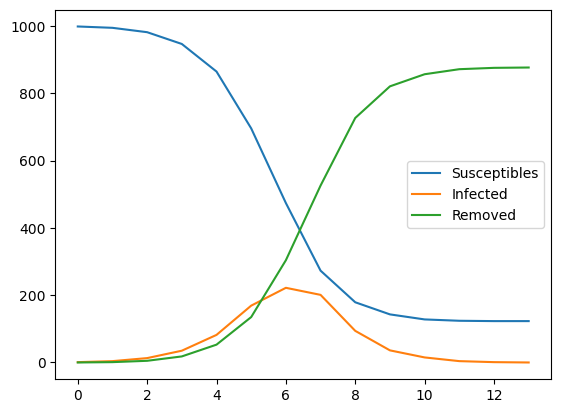

In [2]:
# Fonction :

def sim_SIR_traj(N,p,I0):
    S, R, I = [N - I0], [0], [I0]               # declaration et initialisation des variables
    i = 0                                       # Increment
    DF = pd.DataFrame( [(S[0], I[0], R[0])],    # declaration et initialisation de la DataFrame
                      columns = ["Susceptibles", "Infected", "Removed"] )
    while I[i] != 0:                            # L'épidémie s'achève lorsque le compartiment I est vide
        i += 1
        R.append(R[i-1] + I[i-1])
        S.append(np.random.binomial(S[i-1], (1-p)**I[i-1]))
        I.append(N - R[i] - S[i])
        DF.loc[i] = [S[i], I[i], R[i]]
    return DF

# Test :

N=1000
p=0.0025
I0=1
sim_SIR_traj(N,p,I0)

# Graphique :

sim_SIR_traj(N,p,I0).plot()
plt.show()

## Question 2 (1 points)

Ecrire une fonction **eval_key_quant** qui prend en argument une trajectoire et retourne la durée de l'épidémie $\tau = \inf\{t\geq0\text{ ; }I_t = 0\}$, le nombre totale de personne contaminée durant l'épidémie $N - S_\tau$.  

Appliquer cette fonction à une trajectoire simuler à l'aide de la fonction **sim_SIR_traj**

In [3]:
def eval_key_quant(trajectoire):   # On sait deja que la trajectoire est donner par la fonction sim_SIR_traj
                                   # elle contient donc les colonnes "Susceptibles", "Infected" et "Removed"
    τ = len(trajectoire) - 1
    result = pd.DataFrame([(τ,N - trajectoire["Susceptibles"][τ])],
                          columns = ["duration_epidemic","people_infected"])

    return result

eval_key_quant(sim_SIR_traj(N,p,I0))

,duration_epidemic,people_infected
0,14,908


## Question 3 (2 points)

Générer 1,000 trajectoires et tracer un histogramme pour la durée de l'épidémie et pour le nombre total de personne contaminés sur ces 1,000 scénarios. 

In [ ]:
# Histogramme de la durée de l'épidémie
Nombre_Test = 1000
DF = eval_key_quant(sim_SIR_traj(N,p,I0))

for i in range(1,Nombre_Test):
    DF.loc[i] = [eval_key_quant(sim_SIR_traj(N,p,I0))["duration_epidemic"][0],
                 eval_key_quant(sim_SIR_traj(N,p,I0))["people_infected"][0]]
DF
plt.hist(DF["duration_epidemic"])
plt.title("La durée de l'épidémie")
plt.show()

In [ ]:
# Histogramme de la taille finale de l'épidémie

plt.hist(DF["people_infected"])
plt.title("Le nombre total de personne contaminés")
plt.show()